# Image Compression with K-means Clustering

## Importing Libraries

In [23]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [24]:
plt.rcParams['figure.figsize'] = (20, 12)

## Data Preprocessing 


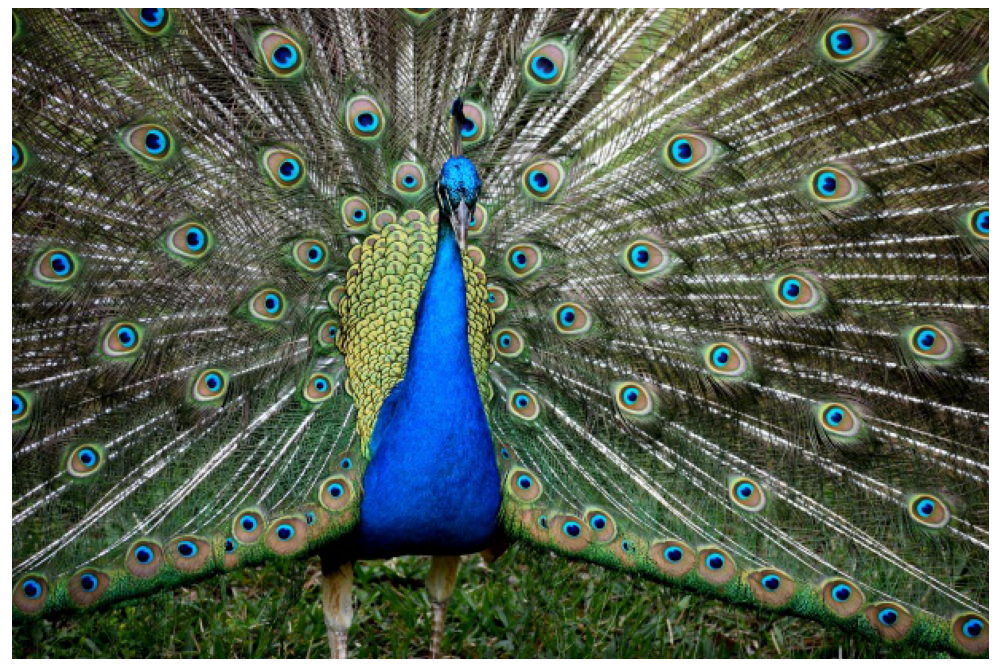

In [25]:
image = io.imread('images/3-peacock.jpg')
ax = plt.axes(xticks =[], yticks =[])
ax.imshow(image)

In [26]:
image.shape

(410, 615, 3)

In [27]:
image_data = (image/255.0).reshape(410*615, 3)   # (image/255.0).reshape(-1,3)
image_data.shape

(252150, 3)

## Visualizing the Color Space using Point Clouds


In [28]:
from plot_utils import plot_utils

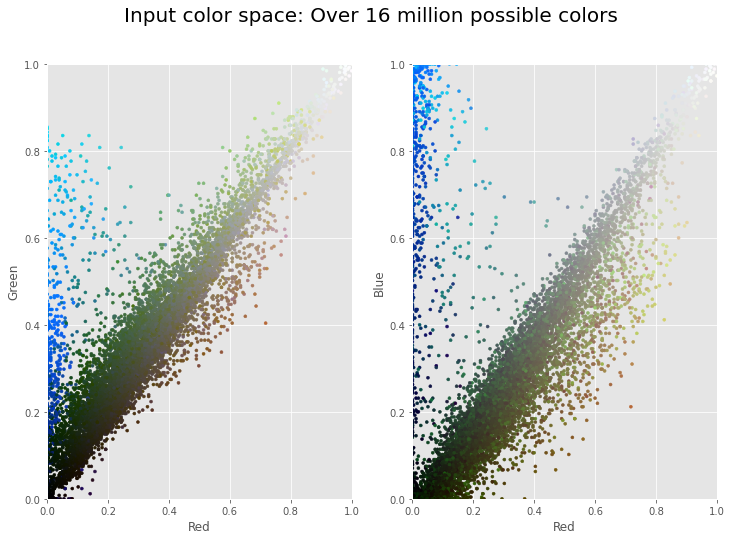

In [29]:
x = plot_utils(image_data, title = 'Input color space: Over 16 million possible colors')
x.colorSpace()

## Visualizing the K-means Reduced Color Space

In [30]:
from sklearn.cluster import MiniBatchKMeans

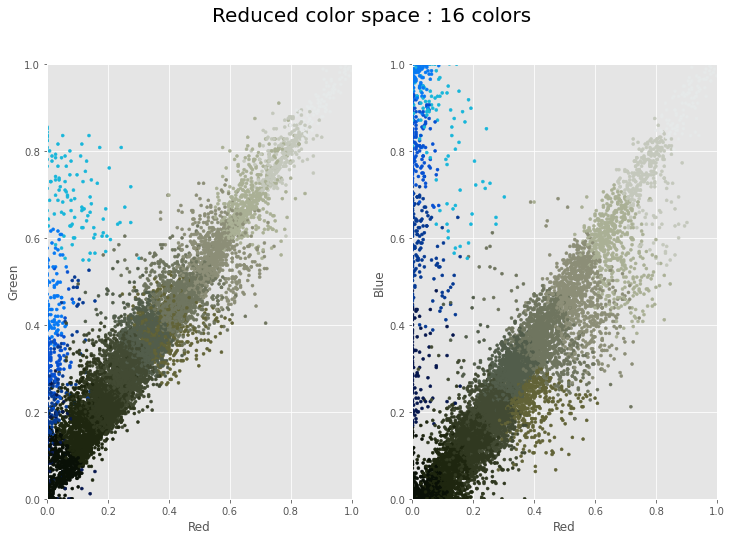

In [31]:
k_means = MiniBatchKMeans( n_clusters= 16).fit(image_data)
k_colors = k_means.cluster_centers_[k_means.predict(image_data)]

y = plot_utils(image_data, colors = k_colors, title  = "Reduced color space : 16 colors")
y.colorSpace()

## K-means Image Compression with Interactive Controls

In [32]:
img_dir = 'images/'

In [33]:
@interact
def color_compression(image =os.listdir(img_dir), k = IntSlider(min=1,max=256, step=1, value=16,
                                                                continuous_update=False,
                                                               layout = dict(width = '100%'))):
    input_img = io.imread(img_dir + image)
    img_data = (input_img/255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('K-means Image Compression', fontsize = 20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors) ')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top = 0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…